In [ ]:
!pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio===0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     |██████████████▋                 | 834.1 MB 1.4 MB/s eta 0:11:46tcmalloc: large alloc 1147494400 bytes == 0x55d3d11da000 @  0x7f55d77ff615 0x55d3ce2ee3bc 0x55d3ce3cf18a 0x55d3ce2f11cd 0x55d3ce3e3b3d 0x55d3ce365458 0x55d3ce36002f 0x55d3ce2f2aba 0x55d3ce3652c0 0x55d3ce36002f 0x55d3ce2f2aba 0x55d3ce361cd4 0x55d3ce3e4986 0x55d3ce361350 0x55d3ce3e4986 0x55d3ce361350 0x55d3ce3e4986 0x55d3ce361350 0x55d3ce2f2f19 0x55d3ce336a79 0x55d3ce2f1b32 0x55d3ce3651dd 0x55d3ce36002f 0x55d3ce2f2aba 0x55d3ce361cd4 0x55d3ce36002f 0x55d3ce2f2aba 0x55d3ce360eae 0x55d3ce2f29da 0x55d3ce361108 0x55d3ce36002f
     |██████████████████▌             | 1055.7 MB 1.2 MB/s eta 0:10:49tcmalloc: large alloc 1434370048 bytes == 0x55d415830000 @  0x7f55d77ff615 0x55d3ce2ee3bc 0x55d3ce3cf18a 0x55d3ce2f11cd 0x55d3ce3e3b3d 0x55d3ce365458 0x55d3ce36002f 0x55d3ce2f2aba 0x55d3ce3652c0 0x55d3ce36002f 0x55d3ce2f2aba 0x55d3ce361cd4 0x55d3ce3e4986 0x55d3

In [ ]:
!git clone https://github.com/ultralytics/yolov5/

Cloning into 'yolov5'...
remote: Enumerating objects: 11142, done.
remote: Total 11142 (delta 0), reused 0 (delta 0), pack-reused 11142
Receiving objects: 100% (11142/11142), 11.14 MiB | 31.77 MiB/s, done.
Resolving deltas: 100% (7703/7703), done.


In [ ]:
import os
os.chdir('/content/yolov5/')
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 5.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-3-3 torch 1.10.2+cu113 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [ ]:
img = 'https://cdn1-production-images-kly.akamaized.net/RqiT1IUcA7o33qEFmCb2fxQ3CRw=/0x793:7689x5127/1200x675/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/3618829/original/030918200_1635727640-AP21304609325202.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 675x1200 18 persons, 3 handbags, 1 tv
Speed: 3380.6ms pre-process, 373.1ms inference, 6.3ms NMS per image at shape (1, 3, 384, 640)


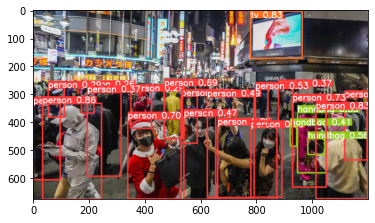

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(filename)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()